https://fivethirtyeight.com/features/are-you-hip-enough-to-be-square/

# Riddler Express

# Riddler Classic

First, simulation. We'll measure in feet to make things easier

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
n_trials = 10000
n_splits = 3
lengths = np.zeros(n_trials)
splits = np.array([0., 6, 6, 6, 1])
for i in range(n_trials):
    splits[1:4] = sorted(stats.uniform(0, 1).rvs(3))
    mid = (splits < 0.5).sum()
    lengths[i] = splits[mid] - splits[mid-1]


In [3]:
lengths.mean()

0.46828042798320113

What about by hand?

For this we consider the process of choosing a split as having 2 components. First, we flip a coin to decide which side of the midpoint the split is on. Next, we choose a split at a random point in that side.

We can then break the problem into 4 possibilities. Here they are graphically, with the probabilities:
```
 | | | 6           1/8
  | |  6   |       3/8
   |   6  | |      3/8
       6 | | |     1/8
```
In the first and last cases, the average length is

In [4]:
(1 + stats.beta(1, 3).mean())/2

0.625

In the second and third, it's

In [5]:
(stats.beta(1, 2).mean() + stats.beta(1, 1).mean())/2

0.41666666666666663

In [6]:
1/4 * (1 + stats.beta(1, 3).mean())/2 + 3/4 * (stats.beta(1, 2).mean() + stats.beta(1, 1).mean())/2

0.46875

If weren't looking for average lengths that include the 0 point, then that's

In [7]:
stats.beta(1, 3).mean()

0.25

So we could do a graph of the lengths for the various points.

So let's solve the general problem.

First, to simplify away the beta distribution: in general, if there are $m$ points in a segment on length 1, then the average length of the segment left (or right) of all of the points is $1 \over (m+1)$.



Text(0, 0.5, 'expected length of segment')

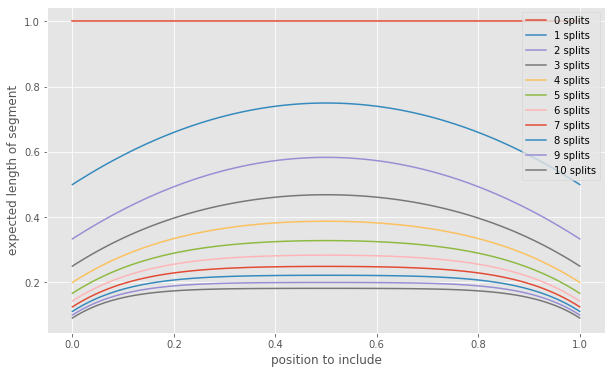

In [8]:
fig, ax = plt.subplots(figsize=(10, 6)
                      )
position = np.linspace(0, 1, 100)
for n_splits in range(0, 11):
    dist = stats.binom(n_splits, position)
    expected = 0
    for n_left in range(0, n_splits+1):
        prob = dist.pmf(n_left)
        length = position / (n_left + 1) + (1-position)  / (n_splits - n_left + 1)
        expected += prob * length
    ax.plot(position, expected, label=f'{n_splits} splits')
ax.legend()
ax.set_xlabel("position to include")
ax.set_ylabel("expected length of segment")
